In [ ]:
import sklearn.datasets
import numpy as np

In [5]:
iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
print('The data is {}'.format(X))
print('The target is {}'.format(y))

The data is [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]


In [23]:
class LogitRegression :
	def __init__(self, lr = 0.1, epochs = 1000000, fit_intercept = True, verbose = False) :
		self.lr = lr
		self.epochs = epochs
		self.fit_intercept = fit_intercept
		self.verbose = verbose

	def __sigmoid(self, z) :
		return 1 / (1 + np.exp(-z))

	def __add_intercept(self, X) :
		intercept = np.ones((X.shape[0], 1))
		res = np.concatenate((X, intercept), axis = 1)
		return res

	def fit(self, X, y) :
		self.X = X
		self.y = y.reshape(X.shape[0],1)
		if self.fit_intercept :
			self.X = self.__add_intercept(self.X)
		self.weights = np.zeros(self.X.shape[1]).reshape(self.X.shape[1],1)

		print('Fitting...')
		for _ in range(self.epochs) :
			z = np.dot(self.X, self.weights)
			# print("Z is equal to {}. This goes to sigmoid.".format(z))
			p = self.__sigmoid(z)
			# print("Probabilities are equal to {}".format(p))
			# print("Shape of p: {}. Shape of y: {}. Shape of p-y: {}".format(p.shape, self.y.shape, (p-self.y).shape))
			self.weights -= self.lr * (np.dot(self.X.T, (p - self.y)) / self.y.size)
			if self.verbose :
				if (_ % 10000 == 0) :
					print("Weights: {}. Epochs passed: {:.2f}%".format(self.weights, _ / self.epochs * 100))
					#print("P - y = {}".format(p - self.y))

	def predict_proba(self, X) :
		if self.fit_intercept :
			X = self.__add_intercept(X)
		return self.__sigmoid(np.dot(X, self.weights))

	def predict(self, X, threshold = 0.5) :
		return 1*(self.predict_proba(X) >= threshold).T[0]

In [27]:
if __name__ == "__main__" :
	log = LogitRegression(lr = 0.1, epochs = 300000, verbose = False)
	%time log.fit(X, y)
	log.predict(X)
	y_pred = log.predict(X)

X shape is (150, 3)
weights shape is (3, 1)
going into loops
CPU times: user 4.73 s, sys: 95.3 ms, total: 4.83 s
Wall time: 4.73 s


The iris dataset - shown only 2 features and the distinction between Iris Setosa and other two Irises


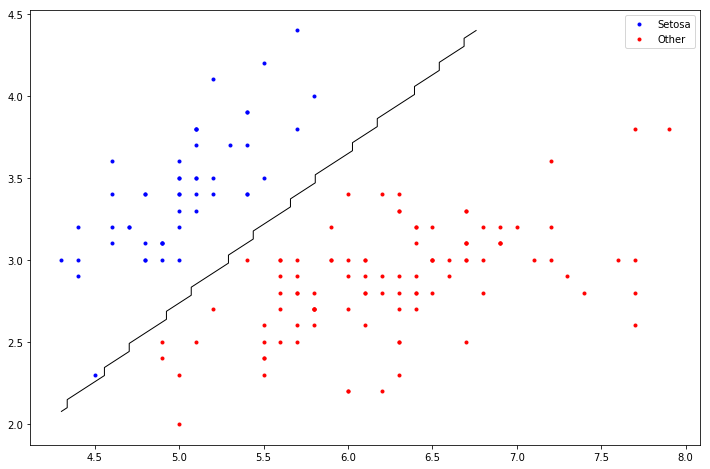

In [55]:
######################
# Creating nice graphs
######################
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color = 'b', marker = '.', label = 'Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = 'r', marker = '.', label = 'Other')
print("The iris dataset - shown only 2 features and the distinction between Iris Setosa and other two Irises")
plt.legend()
x1min, x1max = X[:,0].min(), X[:,0].max()
y1min, y1max = X[:,1].min(), X[:,1].max()
xvalues, yvalues = np.meshgrid(np.linspace(x1min, x1max), np.linspace(y1min, y1max))
xypairs = np.c_[xvalues.ravel(), yvalues.ravel()]
predictions = log.predict(xypairs).reshape(len(xvalues),len(yvalues))
plt.contour(xvalues, yvalues, predictions, [0.5], colors = 'black', linewidths = 1)
plt.show()